In [2]:
# import libraries and modules

import torch

from setup import *

from axis_angle import *

from axis_angle_analysis import *

In [3]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# 1. TEAPOT

In [4]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


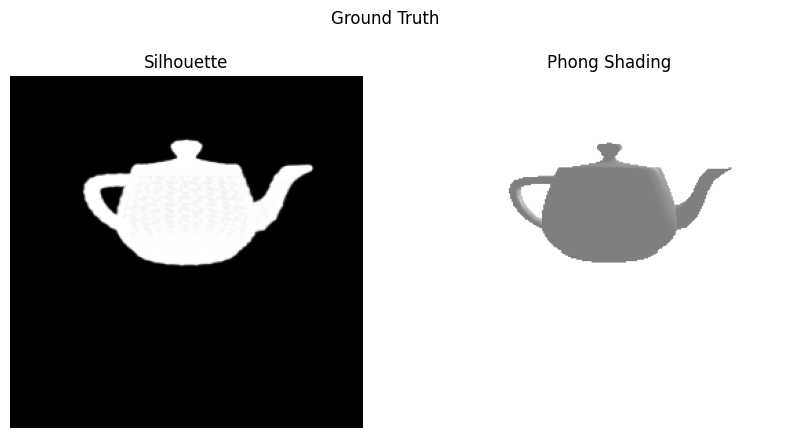

In [5]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

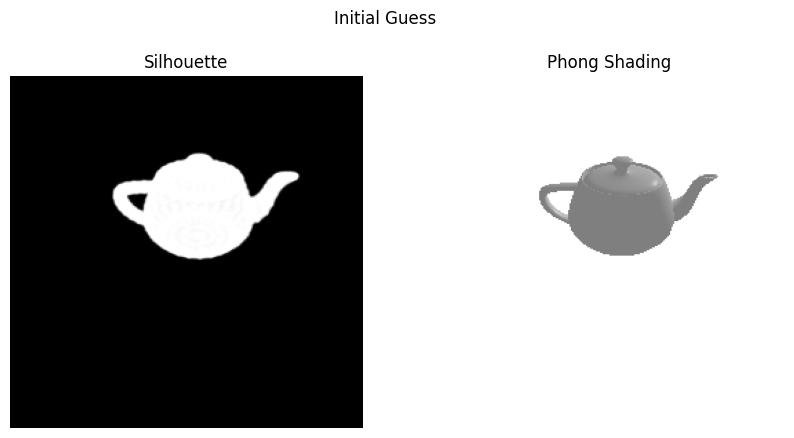

In [12]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)

# # save R and T to a file
np.save("data/teapot_R_init_1.npy", R_init.cpu().numpy())
np.save("data/teapot_T_init_1.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_1.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_1.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)



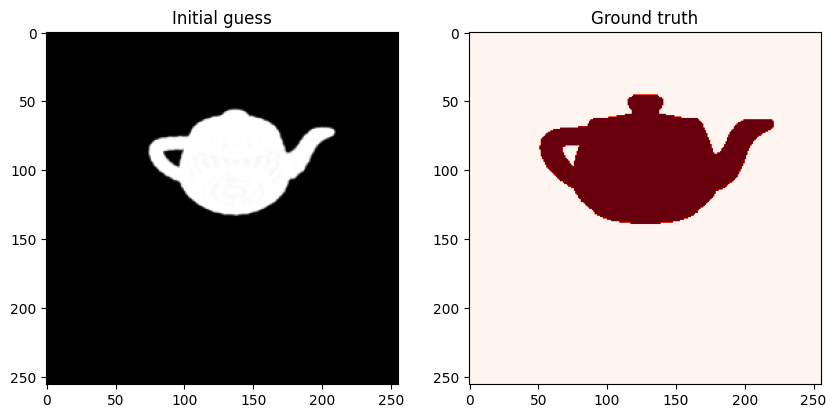

  0%|          | 0/50 [00:08<?, ?it/s]

iteration: 0, loss: 3509.255615234375


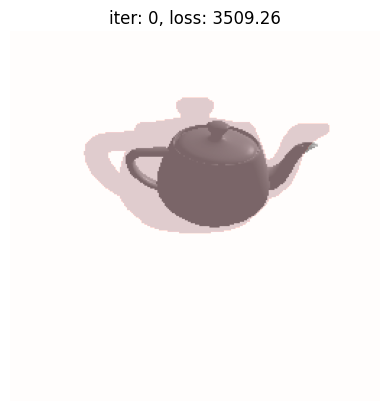

  4%|▍         | 2/50 [00:17<06:50,  8.55s/it]

iteration: 1, loss: 3319.31884765625


  6%|▌         | 3/50 [00:26<07:00,  8.95s/it]

iteration: 2, loss: 3164.583251953125


  8%|▊         | 4/50 [00:35<06:59,  9.11s/it]

iteration: 3, loss: 2940.73779296875


 10%|█         | 5/50 [00:45<06:52,  9.17s/it]

iteration: 4, loss: 2792.349853515625


 12%|█▏        | 6/50 [00:54<06:49,  9.30s/it]

iteration: 5, loss: 2614.605224609375


 14%|█▍        | 7/50 [01:04<06:40,  9.32s/it]

iteration: 6, loss: 2360.79736328125


 16%|█▌        | 8/50 [01:14<06:51,  9.80s/it]

iteration: 7, loss: 2207.42138671875


 18%|█▊        | 9/50 [01:25<06:55, 10.14s/it]

iteration: 8, loss: 2072.96142578125


 20%|██        | 10/50 [01:37<06:58, 10.46s/it]

iteration: 9, loss: 1910.161865234375


 20%|██        | 10/50 [01:48<06:58, 10.46s/it]

iteration: 10, loss: 1737.789794921875


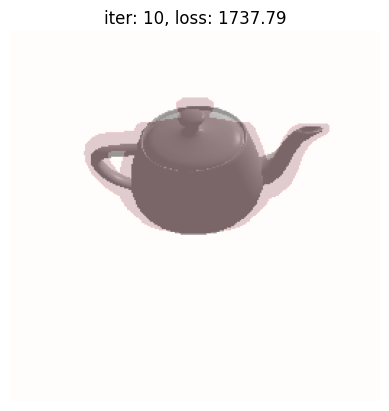

 24%|██▍       | 12/50 [01:59<06:53, 10.88s/it]

iteration: 11, loss: 1561.72900390625


 26%|██▌       | 13/50 [02:11<06:50, 11.11s/it]

iteration: 12, loss: 1391.0875244140625


 28%|██▊       | 14/50 [02:23<06:47, 11.32s/it]

iteration: 13, loss: 1317.3157958984375


 30%|███       | 15/50 [02:35<06:46, 11.61s/it]

iteration: 14, loss: 3564.50927734375


 32%|███▏      | 16/50 [02:48<06:46, 11.96s/it]

iteration: 15, loss: 3068.956787109375


 34%|███▍      | 17/50 [03:00<06:37, 12.05s/it]

iteration: 16, loss: 2473.809814453125


 36%|███▌      | 18/50 [03:12<06:28, 12.14s/it]

iteration: 17, loss: 2000.8631591796875


 38%|███▊      | 19/50 [03:24<06:14, 12.08s/it]

iteration: 18, loss: 1903.18408203125


 40%|████      | 20/50 [03:36<06:01, 12.05s/it]

iteration: 19, loss: 5099.31787109375


 40%|████      | 20/50 [03:49<06:01, 12.05s/it]

iteration: 20, loss: 5232.91943359375


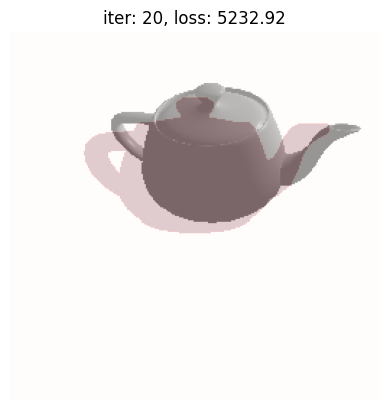

 44%|████▍     | 22/50 [04:03<05:57, 12.78s/it]

iteration: 21, loss: 4928.267578125


 46%|████▌     | 23/50 [04:17<05:50, 12.98s/it]

iteration: 22, loss: 4416.05029296875


 48%|████▊     | 24/50 [04:30<05:39, 13.06s/it]

iteration: 23, loss: 3749.514892578125


 50%|█████     | 25/50 [04:43<05:28, 13.12s/it]

iteration: 24, loss: 2958.86962890625


 52%|█████▏    | 26/50 [04:57<05:18, 13.26s/it]

iteration: 25, loss: 2272.208251953125


 54%|█████▍    | 27/50 [05:11<05:10, 13.51s/it]

iteration: 26, loss: 1849.83984375


 56%|█████▌    | 28/50 [05:24<04:55, 13.42s/it]

iteration: 27, loss: 1965.000244140625


 58%|█████▊    | 29/50 [05:37<04:41, 13.39s/it]

iteration: 28, loss: 2186.96728515625


 60%|██████    | 30/50 [05:50<04:25, 13.27s/it]

iteration: 29, loss: 2382.470458984375


 60%|██████    | 30/50 [06:03<04:25, 13.27s/it]

iteration: 30, loss: 2567.770751953125


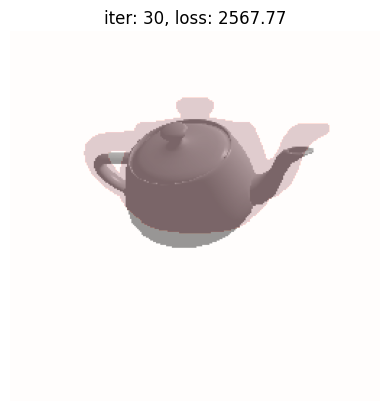

 64%|██████▍   | 32/50 [06:17<03:59, 13.31s/it]

iteration: 31, loss: 2704.484375


 66%|██████▌   | 33/50 [06:31<03:49, 13.50s/it]

iteration: 32, loss: 2708.86083984375


 68%|██████▊   | 34/50 [06:44<03:34, 13.43s/it]

iteration: 33, loss: 2591.93115234375


 70%|███████   | 35/50 [06:58<03:22, 13.48s/it]

iteration: 34, loss: 2352.017578125


 72%|███████▏  | 36/50 [07:12<03:09, 13.56s/it]

iteration: 35, loss: 2062.831298828125


 74%|███████▍  | 37/50 [07:25<02:53, 13.38s/it]

iteration: 36, loss: 1766.616455078125


 76%|███████▌  | 38/50 [07:38<02:39, 13.32s/it]

iteration: 37, loss: 1504.7996826171875


 78%|███████▊  | 39/50 [07:51<02:25, 13.25s/it]

iteration: 38, loss: 1396.913330078125


 80%|████████  | 40/50 [08:04<02:11, 13.19s/it]

iteration: 39, loss: 1457.32373046875


 80%|████████  | 40/50 [08:17<02:11, 13.19s/it]

iteration: 40, loss: 1506.021240234375


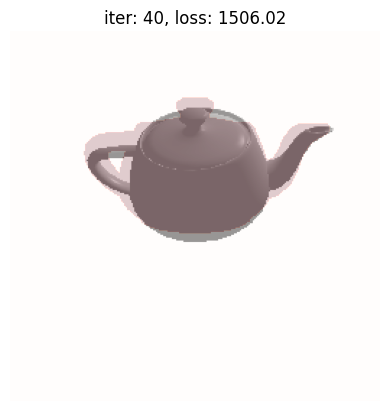

 84%|████████▍ | 42/50 [08:32<01:48, 13.58s/it]

iteration: 41, loss: 1629.6416015625


 86%|████████▌ | 43/50 [08:46<01:35, 13.65s/it]

iteration: 42, loss: 1371.6439208984375


 88%|████████▊ | 44/50 [08:59<01:21, 13.58s/it]

iteration: 43, loss: 1240.18359375


 90%|█████████ | 45/50 [09:13<01:08, 13.62s/it]

iteration: 44, loss: 1497.86181640625


 92%|█████████▏| 46/50 [09:26<00:54, 13.63s/it]

iteration: 45, loss: 1688.8458251953125


 94%|█████████▍| 47/50 [09:40<00:41, 13.75s/it]

iteration: 46, loss: 1535.80224609375


 96%|█████████▌| 48/50 [09:54<00:27, 13.79s/it]

iteration: 47, loss: 1178.73974609375


 98%|█████████▊| 49/50 [10:08<00:13, 13.81s/it]

iteration: 48, loss: 1032.8505859375


100%|██████████| 50/50 [10:21<00:00, 12.43s/it]

iteration: 49, loss: 1193.9849853515625


In [13]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 50, device)

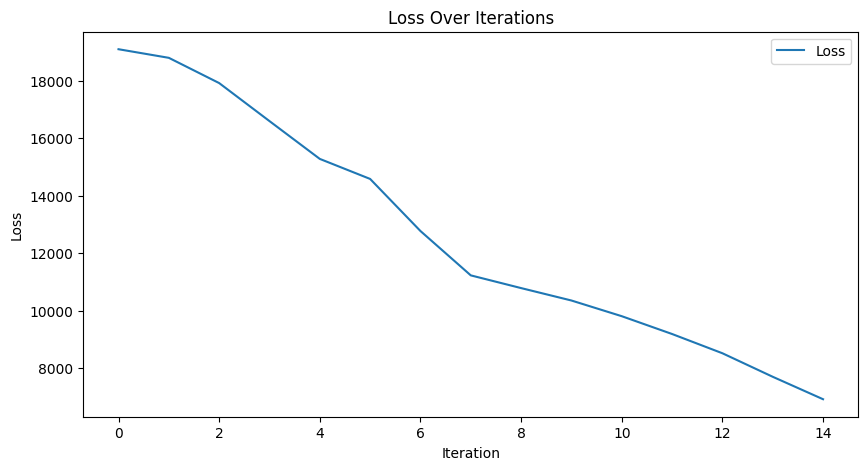

In [ ]:
plot_losses(losses)

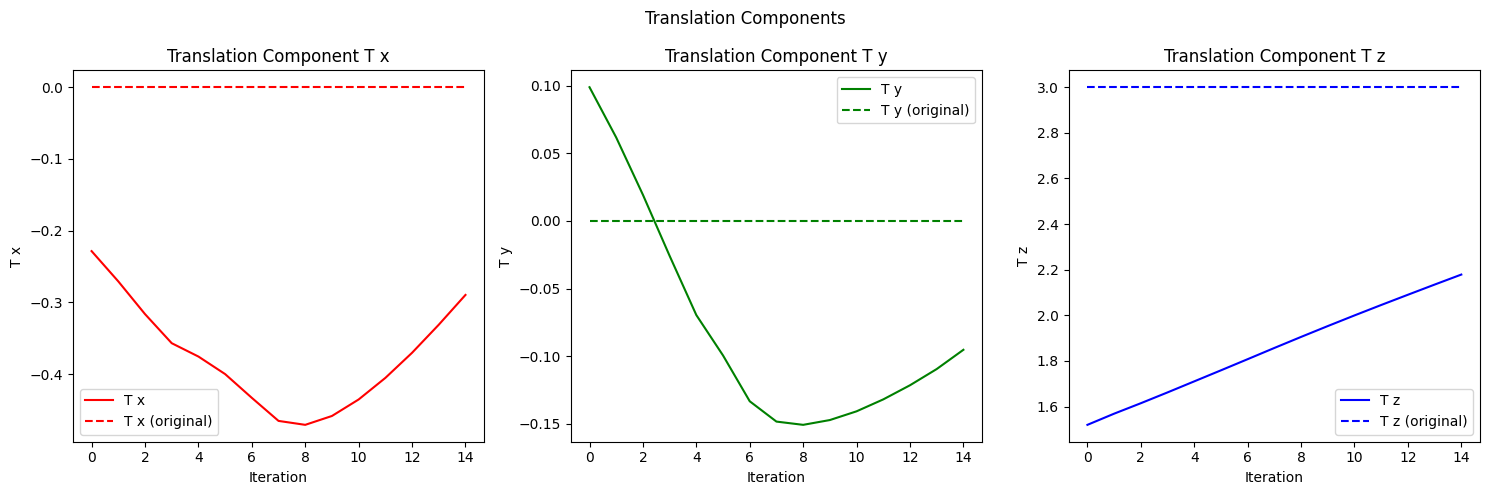

In [ ]:
plot_translations(T_gt, parameter_updates)

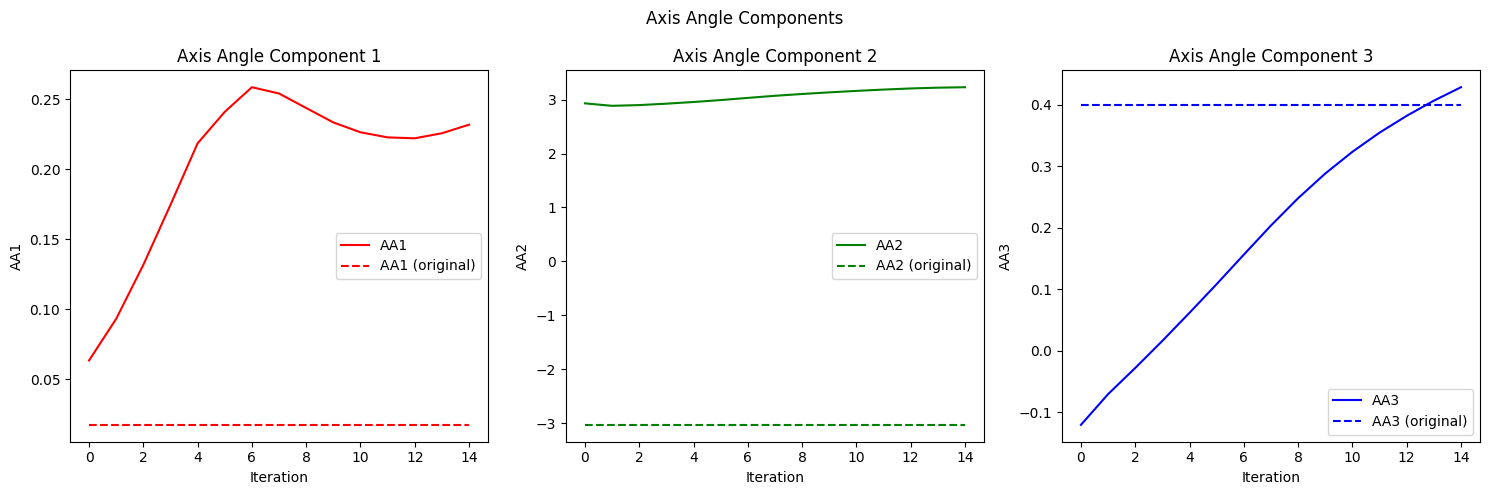

In [ ]:
plot_axis_angles(R_gt, parameter_updates)

## Teapot (Another initialisation)

In [14]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_env/lib/python3.8/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


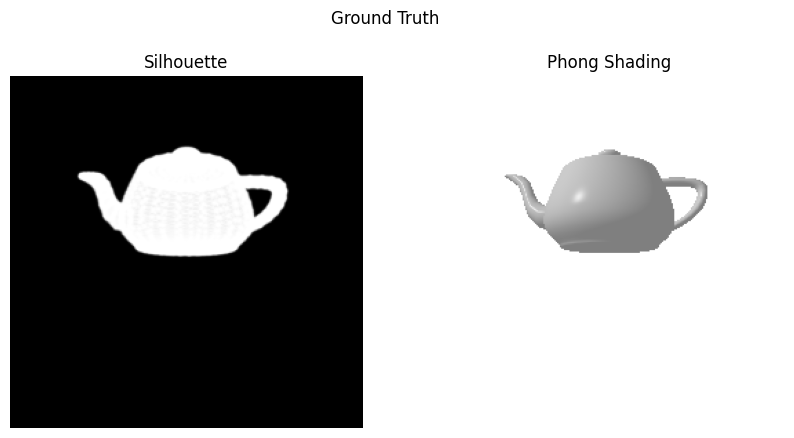

In [20]:
# Ground truth parameters

params = {
    "dist": -3,
    "elev": 5,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

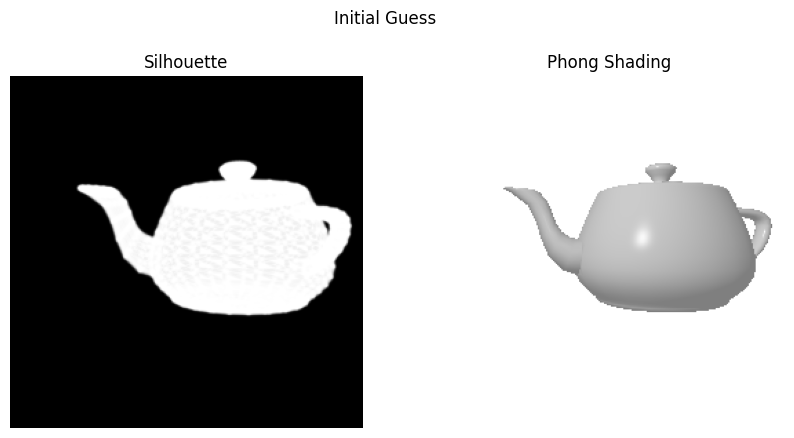

In [ ]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

# # Initial guess for R and T
# R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.5, device=device)

# # save R and T to a file
# np.save("data/teapot_R_init_2.npy", R_init.cpu().numpy())
# np.save("data/teapot_T_init_2.npy", T_init.cpu().numpy())

# read R and T from a file
R_init = torch.tensor(np.load("data/teapot_R_init_2.npy")).to(device)
T_init = torch.tensor(np.load("data/teapot_T_init_2.npy")).to(device)

plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

In [ ]:
losses, parameter_updates, R_min, T_min = train_angle_axis_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 50, device)